<a href="https://colab.research.google.com/github/ArinPro13/Medical_Insuarance_Cost-Prediction-Model/blob/main/Medical_Insuarance_Cost_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing dependencies

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import streamlit as st

Data Collection & Analysis

In [77]:
Insuarance_dataset = pd.read_csv('/content/insurance.csv') #loading the csv file in a dataframe

In [78]:
Insuarance_dataset.head() #displaying the first 5 rows of the dataframe

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [79]:
Insuarance_dataset.shape #displaying the number of rows and columns

(1338, 7)

In [80]:
Insuarance_dataset.info() #displaying the information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Statistical Analysis

In [81]:
Insuarance_dataset.describe() #displaying the statistical analysis of the dataframe

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<ipython-input-82-02e6859cd4b4>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Insuarance_dataset['age'])


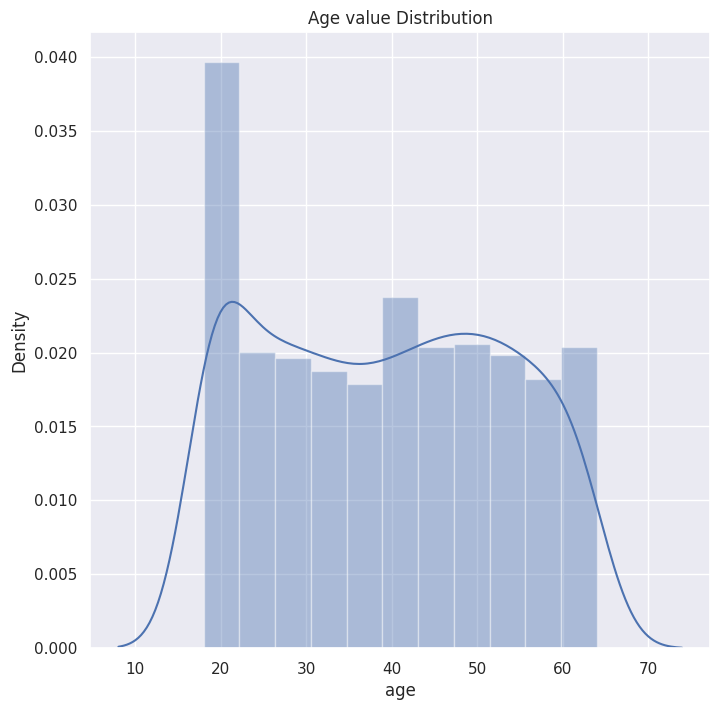

In [82]:
#distribution of age value

sns.set()
plt.figure(figsize=(8,8))
sns.distplot(Insuarance_dataset['age'])
plt.title('Age value Distribution')
plt.show()

<ipython-input-83-d471586b539e>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Insuarance_dataset['bmi'])


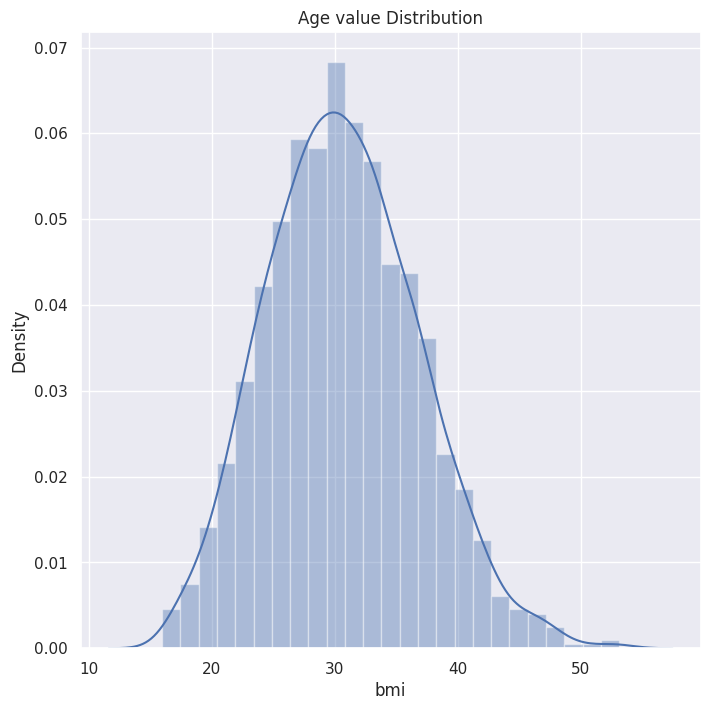

In [83]:
#distribution of bmi value

sns.set()
plt.figure(figsize=(8,8))
sns.distplot(Insuarance_dataset['bmi'])
plt.title('Age value Distribution')
plt.show()

#maximum people in the dataset has bmi above than normal bmi therefore they are overweight

<function matplotlib.pyplot.show(close=None, block=None)>

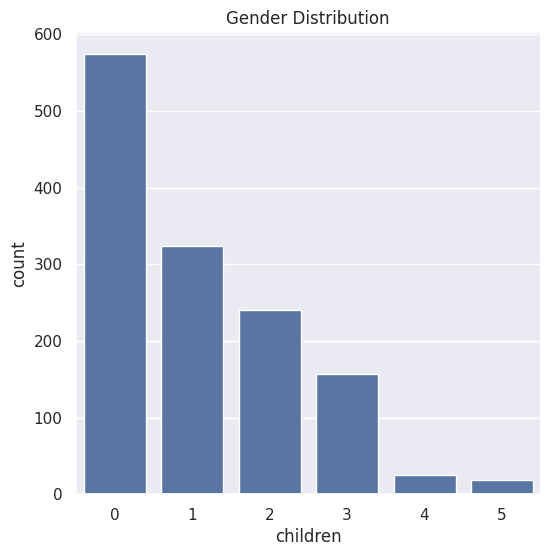

In [84]:
#countplot for children

sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=Insuarance_dataset)
plt.title('Gender Distribution')
plt.show

#max people dont have any children

In [85]:
Insuarance_dataset.value_counts('children') #displaying the number of children

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


<function matplotlib.pyplot.show(close=None, block=None)>

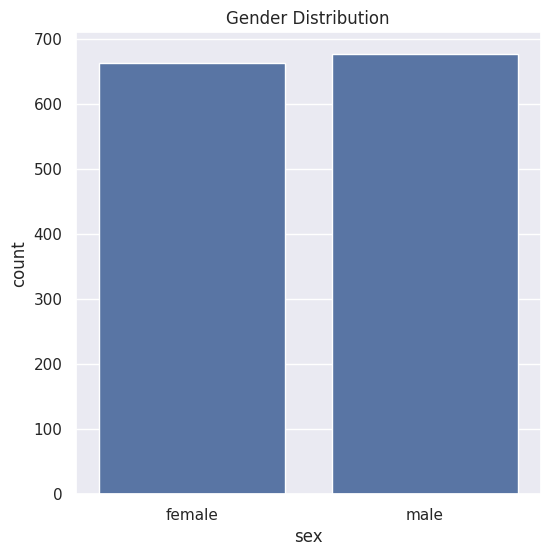

In [86]:
#distribution of gender

sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=Insuarance_dataset)
plt.title('Gender Distribution')
plt.show

In [87]:
Insuarance_dataset['sex'].value_counts() #displaying the number of male and female

,count
sex,
male,676
female,662


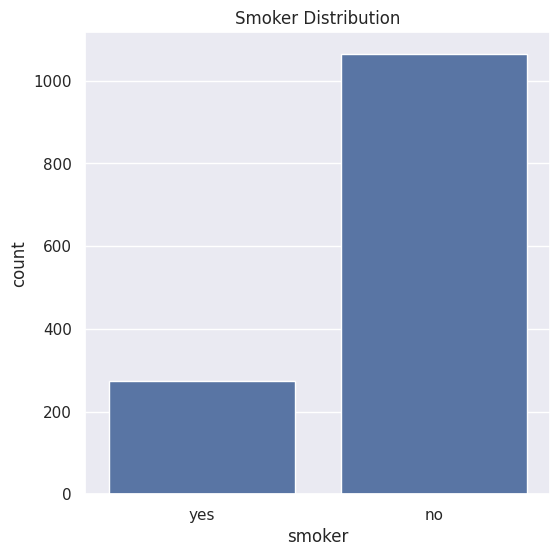

In [88]:
#countplot for smoker coloumn

sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=Insuarance_dataset)
plt.title('Smoker Distribution')
plt.show()

#less number of smokers

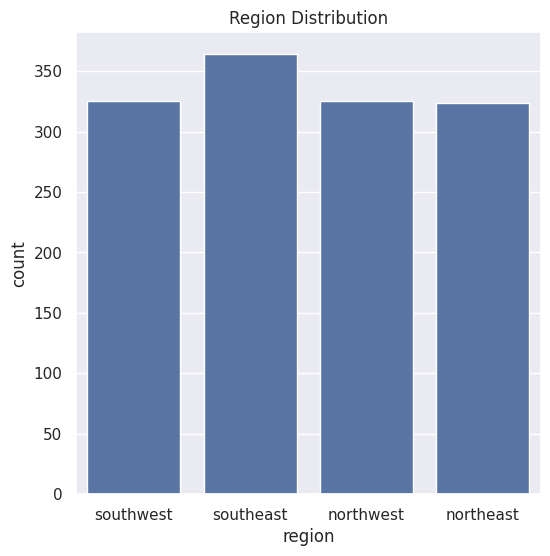

In [89]:
#countplot for region coloumn

sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=Insuarance_dataset)
plt.title('Region Distribution')
plt.show()

<ipython-input-90-9abf98a79c12>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Insuarance_dataset['charges'])


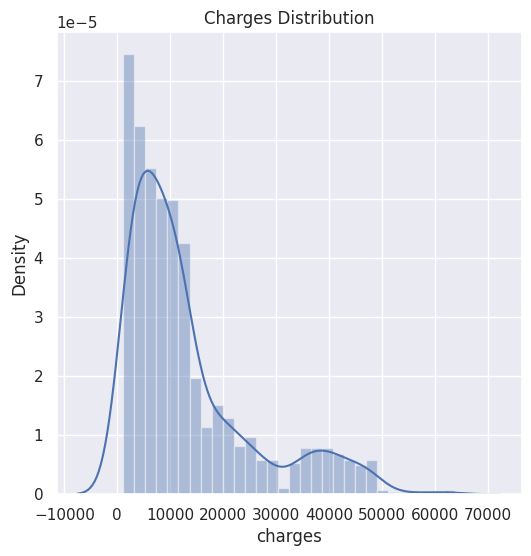

In [90]:
#distribution plot for charges coloumn

sns.set()
plt.figure(figsize=(6,6))
sns.distplot(Insuarance_dataset['charges'])
plt.title('Charges Distribution')
plt.show()

**Data Pre-Processiong(Encode the categorical features)**



In [91]:
Insuarance_dataset.replace({'sex':{'male':0,'female':1}},inplace=True) #encode the sex column
print(Insuarance_dataset['sex'].value_counts())


Insuarance_dataset.replace({'smoker':{'yes':1 , 'no':0}},inplace = True) #encode the smoker column
print(Insuarance_dataset['smoker'].value_counts())


Insuarance_dataset.replace({'region':{'southeast':0 , 'southwest':1 , 'northeast':2 , 'northwest':3}},inplace = True) #encode the region column
print(Insuarance_dataset['region'].value_counts())

sex
0    676
1    662
Name: count, dtype: int64
smoker
0    1064
1     274
Name: count, dtype: int64
region
0    364
1    325
3    325
2    324
Name: count, dtype: int64


In [92]:
Insuarance_dataset.head() #categorical features are encoded

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,0,1725.55230
2,28,0,33.000,3,0,0,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


Splitting the features and target

In [93]:
x = Insuarance_dataset.drop(columns='charges',axis=1) #features
y = Insuarance_dataset['charges'] #target variable in y

Splitting the data into training and testing data

In [103]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.3 , random_state = 2) # 20% data is taken as testing data

In [95]:
print(x.shape , x_train.shape)
print(x_test.shape)

print(y.shape , y_train.shape)
print(y_test.shape)

(1338, 6) (1070, 6)
(268, 6)
(1338,) (1070,)
(268,)


**Model Training**

**Linear Regression**

In [104]:
regressor = LinearRegression() #loading the linear regression model


In [105]:
regressor.fit(x_train , y_train) #training the model

LinearRegression()

**Model Evaluation**

In [106]:
training_data_prediction = regressor.predict(x_train) #prediction on training data


In [107]:
#R^2 value on training data

r2_train = metrics.r2_score(y_train , training_data_prediction)
print('R^2 value on training data : ' , r2_train)


R^2 value on training data :  0.7415730843556845


In [109]:
test_data_prediction = regressor.predict(x_test) #prediction on testing data

In [110]:
#R^2 value on testing data

r2_test = metrics.r2_score(y_test , test_data_prediction)
print('R^2 value on training data : ' , r2_test)


R^2 value on training data :  0.766118606810119


**Building the predictive model**

In [119]:
age = int(input('Enter your age : '))
sex = int(input('Enter your sex (0 for male , 1 for female) : '))
bmi = float(input('Enter your bmi : '))
children = int(input('Enter your number of children : '))
smoker = int(input('Enter your smoker status (0 for no , 1 for yes) : '))
region = int(input('Enter your region (0 for southeast , 1 for southwest , 2 for northeast , 3 for northwest) : '))

input_data = (age , sex , bmi , children , smoker , region)

#changing input data to numpy array

input_data_as_numpy_array = np.asarray(input_data)

#reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

pred = regressor.predict(input_data_reshaped)
print(pred)

Enter your age : 23
Enter your sex (0 for male , 1 for female) : 0
Enter your bmi : 23.845
Enter your number of children : 0
Enter your smoker status (0 for no , 1 for yes) : 0
Enter your region (0 for southeast , 1 for southwest , 2 for northeast , 3 for northwest) : 2
[1529.05922305]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
